## Import necessary libraries

In [ ]:
!pip install statsmodels==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 28.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import required datasets

We want to import the required datasets for life expectancy and the World Happiness Report

In [ ]:
#load the datasets
le_df=pd.read_csv('life expectancy.csv')
wh_df=pd.read_csv('/work/World Happiness Report 2019')

We read the 'life expectancy' and 'World Happiness Report 2019' datasets into Pandas DataFrames. These datasets will be merged to explore the relationships between life expectancy, happiness, and socio-economic indicators.


We want to focus on the analysis of the year 2019 to ensure consistency between datasets

In [ ]:
# Filter data for the year 2019
le_df_2019 = le_df[le_df['Year'] == 2019]
wh_df_2019 = wh_df.copy() 
le_df_2019

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
3132,Afghanistan,AFG,South Asia,Low income,2019,64.833,26.9,6079.999924,13.242202,3.213780,11.217000,2.0,NaN,3481166.42,6034434.86,7601757.82
3133,Angola,AGO,Sub-Saharan Africa,Lower middle income,2019,61.147,17.9,25209.999084,2.533360,1.927457,7.421000,NaN,NaN,1168866.00,7237433.13,4176568.27
3134,Albania,ALB,Europe & Central Asia,Upper middle income,2019,78.573,4.3,4829.999924,NaN,3.916650,11.470000,NaN,47.577141,82288.10,51797.42,631629.88
3135,Andorra,AND,Europe & Central Asia,High income,2019,NaN,NaN,500.000000,6.711585,3.150610,NaN,NaN,100.000004,2124.01,800.50,19002.03
3136,United Arab Emirates,ARE,Middle East & North Africa,High income,2019,77.972,6.0,188860.000610,4.275049,3.867370,2.230000,NaN,99.147700,382562.41,120204.51,1637717.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.777880,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.706250,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.917710,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.465180,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


We filtered the 'life expectancy' dataset to retain only the records corresponding to the year 2019, focusing our analysis on a specific time frame for a more relevant examination, and then created a copy of the 'World Happiness Report 2019' dataset for further processing.

## Handle Missing Values

We want to filter the data for the year 2019 and handle missing values in the life expectancy dataset by filling them with a specific value.

In [ ]:
# Check for missing values in life expectancy dataset
le_df_2019.isnull().sum()
# Drop rows with missing values or fill them
le_df_2019.fillna(0,inplace=True)
#Remove the 'Year' column
le_df_2019=le_df_2019.drop('Year',axis=1)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


The 'le_missing_values' variable now contains the count of missing values for each column in the filtered dataset. It helps us understand the extent of missing data in the life expectancy dataset for the year 2019. The 'le_df_2019' dataset has now been modified to handle missing values. The 'Year' column, which served its purpose for filtering, has been dropped.


## Handle Outliers

We want to ensure the robustness of our analysis and prevent skewed results, we identify and remove outliers from the 'Life Expectancy World Bank' and 'CO2' columns using z-scores. Outliers can significantly impact the results of regression analysis, and removing them helps to achieve more reliable and accurate insights.

In [ ]:
z_scores = stats.zscore(le_df_2019[['Life Expectancy World Bank', 'CO2']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
# Remove outliers
le_df_2019 = le_df_2019[~outliers]

The z-scores are calculated for the 'Life Expectancy World Bank' and 'CO2' columns, and a threshold of 3 is used to identify outliers. Rows with outliers in either column are marked, and these rows are then removed from the 'le_df_2019' dataset. This ensures that extreme values, which could potentially skew our analysis, are excluded from the subsequent regression analysis.

## Addressing Inconsistencies

Check unique values in the 'Region' column to understand the categorical distribution.

In [ ]:
# Check unique values in categorical columns
le_df_2019['Region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

The output displays the unique values in the 'Region' column.

## Normalization or Scaling

The goal is to standardize the scale of specific columns in the life expectancy dataset (le_df_2019). Standardizing these columns is essential for regression analysis, as it ensures that all variables are on a comparable scale, preventing one variable from dominating the model due to its larger magnitude. In this case, the 'Life Expectancy World Bank' and 'CO2' columns are selected for Min-Max scaling.

In [ ]:
# Convert selected columns to a common scale using Min-Max scaling
scaler = MinMaxScaler()
le_df_2019[['Life Expectancy World Bank', 'CO2']] = scaler.fit_transform(le_df_2019[['Life Expectancy World Bank', 'CO2']])

This code utilizes the MinMaxScaler from scikit-learn to transform the 'Life Expectancy World Bank' and 'CO2' columns in the le_df_2019 dataset. Min-Max scaling linearly scales the selected columns to a specified range (usually [0, 1]), preserving the relative differences between data points. This transformation is crucial for maintaining consistency in the units of these variables, facilitating more meaningful interpretations in subsequent analyses such as regression.

## Merge

We want to identify common countries between the life expectancy and World Happiness datasets and then filter datasets based on common countries to merge the filtered datasets on the common identifier ('Country Name' and 'Country or region').

In [ ]:
# Identify common countries
common_countries = set(le_df_2019['Country Name']).intersection(set(wh_df['Country or region']))

# Filter datasets based on common countries
df_le_common = le_df_2019[le_df_2019['Country Name'].isin(common_countries)]
df_wh_common = wh_df[wh_df['Country or region'].isin(common_countries)]

# Merge the filtered datasets
merged_df = pd.merge(df_le_common, df_wh_common, how='inner', left_on='Country Name', right_on='Country or region')

# Save the merged dataset
merged_df.to_csv('merged_dataset.csv', index=False)

The variable 'common_countries' now contains a set of countries present in both datasets. This step ensures we focus the analysis on countries that exist in both datasets, facilitating meaningful comparisons. The dataframes 'df_le_common' and 'df_wh_common' now contain information only for the countries common to both datasets. This filtering ensures that we work with consistent data for subsequent analyses. The 'merged_df' dataframe combines information from both datasets, linking rows based on common countries. The merging process creates a unified dataset for further exploration and analysis. The 'merged_dataset.csv' file is created, preserving the integrated data for external use or sharing.

Check for duplicate rows to ensure the dataset does not contain duplicate rows that could skew the analysis and identify repeated countries to ensure each country is represented uniquely and identify any instances of repeated country entries.

In [ ]:
# Check for duplicate rows based on all columns
duplicate_rows = merged_df[merged_df.duplicated()]

# Get unique country names from the merged dataset
unique_countries = merged_df['Country Name'].unique()

# Initialize an empty list to store repeated countries
repeated_countries = []

# Check for each country if it is repeated
for country in unique_countries:
    is_repeated = merged_df[merged_df['Country Name'] == country].duplicated().any()
    if is_repeated:
        repeated_countries.append(country)
duplicate_rows
repeated_countries

[]

The code checks for duplicate rows in the merged dataset by comparing all columns. The output displays any rows that are identical to others in the dataset. In this case, an empty DataFrame is returned, indicating that there are no duplicate rows. The code also extracts unique country names from the 'Country Name' column and checks for any instances where a country is repeated in the dataset. The output, an empty list [], indicates that no countries are repeated, confirming that each country is represented uniquely in the dataset.

## Exploratory Data Analysis

### Descriptive Statistics

The objective behind this code block is to gain an initial understanding of the dataset's key statistical characteristics. Descriptive statistics provide insights into the central tendency, dispersion, and shape of the distribution for each variable in the merged dataset. This includes measures such as mean, standard deviation, minimum, maximum, and quartiles.

In [ ]:
# Descriptive Statistics
summary_stats = merged_df.describe()
summary_stats

,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.865414,8.272932,0.020856,6.622913,2.442944,6.814053,0.917293,41.667760,1.629016e+06,4.510859e+06,1.079797e+07,76.616541,5.456669,0.906263,1.214293,0.733910,0.404150,0.186910,0.114248
std,0.093050,10.898340,0.096772,2.756529,2.377765,5.328528,1.328847,37.518233,5.667481e+06,1.496866e+07,3.770850e+07,45.922814,1.138546,0.402696,0.302703,0.236391,0.141793,0.096603,0.098354
min,0.631642,0.000000,0.000022,0.000000,0.000000,0.100000,0.000000,0.000000,6.755560e+03,3.333120e+03,6.718617e+04,1.000000,2.853000,0.000000,0.000000,0.105000,0.000000,0.000000,0.000000
25%,0.795838,2.500000,0.000672,4.445151,0.000000,3.510000,0.000000,0.000000,1.378099e+05,1.054399e+05,1.047087e+06,36.000000,4.559000,0.578000,1.058000,0.555000,0.317000,0.113000,0.050000
50%,0.889726,3.100000,0.002221,6.578142,2.592020,5.010000,0.000000,37.684884,3.888181e+05,5.670738e+05,2.425972e+06,75.000000,5.432000,0.983000,1.294000,0.802000,0.431000,0.178000,0.086000
75%,0.931442,8.300000,0.008590,8.497005,4.156610,8.530000,2.500000,81.033795,1.033605e+06,3.281846e+06,6.365741e+06,116.000000,6.223000,1.221000,1.457000,0.884000,0.514000,0.246000,0.143000
max,1.000000,54.800000,1.000000,16.767063,8.927027,28.469999,4.500000,100.000000,5.356391e+07,1.432145e+08,3.246378e+08,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The describe() function generates a summary of statistics for each numerical column in the merged dataset. The output includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numerical variable. These statistics serve as a foundational exploration, offering an initial glimpse into the dataset's overall structure and variability. It provides a concise overview that aids in identifying potential outliers, assessing the range of values, and guiding subsequent analyses.

### Distribution of Life expectancy and happiness scores

We want to visualize the distribution of happiness scores and life expectancy in the merged dataset.

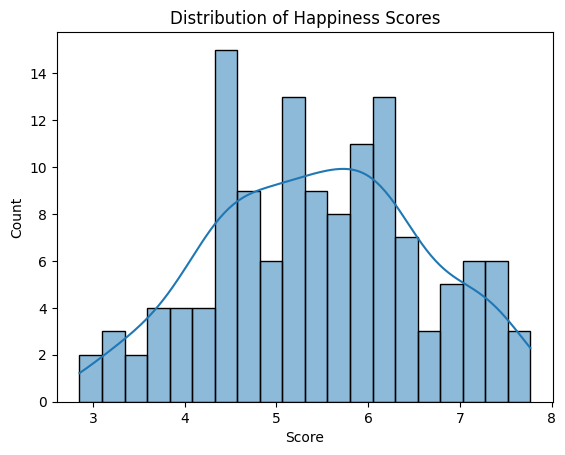

In [ ]:
# Distribution of happiness scores
sns.histplot(merged_df['Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()

The histogram displays the distribution of happiness scores across 133 countries. The x-axis represents the happiness scores, while the y-axis shows the frequency of countries falling into specific score ranges. The distribution appears approximately normal, indicating a diversity of happiness levels in the dataset. The mean score is around 5.45.


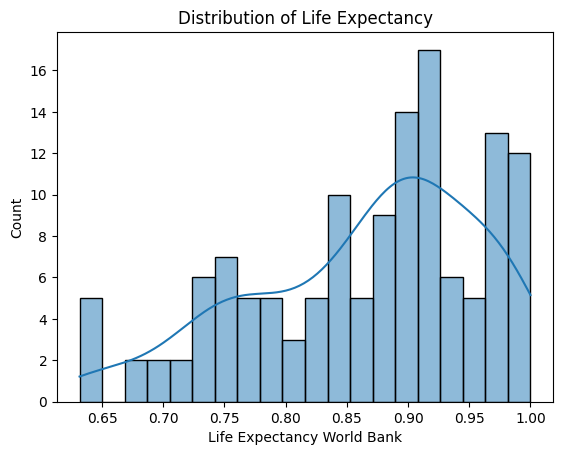

In [ ]:
# Distribution of life expectancy
sns.histplot(merged_df['Life Expectancy World Bank'], bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

The histogram displays the distribution of life expectancy across 133 countries. The plot indicates that the distribution is left-skewed, with a mean life expectancy of approximately 0.87. These values are a result of the Min-Max scaling done previously to perform a regression model, which is why they are not expressed in years. The majority of countries exhibit relatively high life expectancy, but the skewness suggests that some nations may have lower life expectancy values, warranting further investigation.

### Correlation Analysis

We want to understand the relationships between key variables by visualizing the correlation matrix.

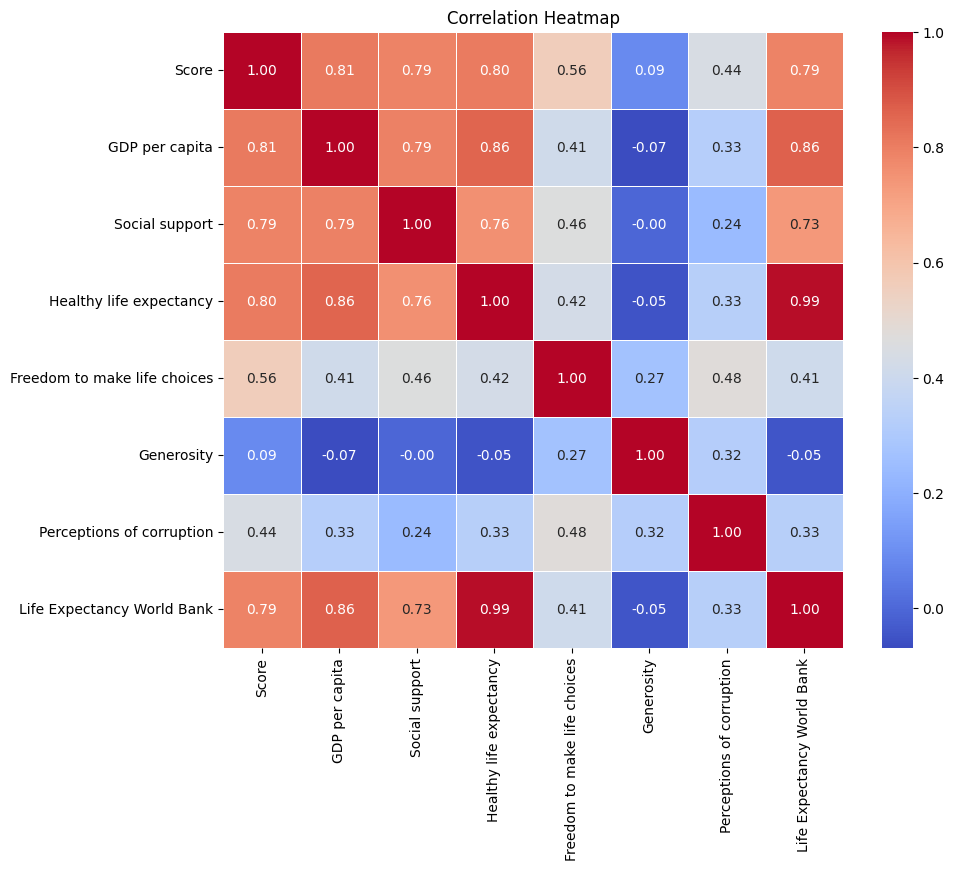

In [ ]:
# Heatmap of correlations between variables
variables = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Life Expectancy World Bank']
subset_df = merged_df[variables]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

After executing the code, a heatmap is generated, visualizing the correlation matrix between selected variables, including 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', and 'Life Expectancy World Bank'. Each cell in the heatmap represents the correlation coefficient between the corresponding pair of variables. Higher values indicate stronger positive correlations, while lower values or negative correlations suggest weaker relationships

### Pairplot

We want to visualize pairwise relationships to explore the pairwise relationships between selected variables, such as life expectancy, GDP per capita, and happiness score.

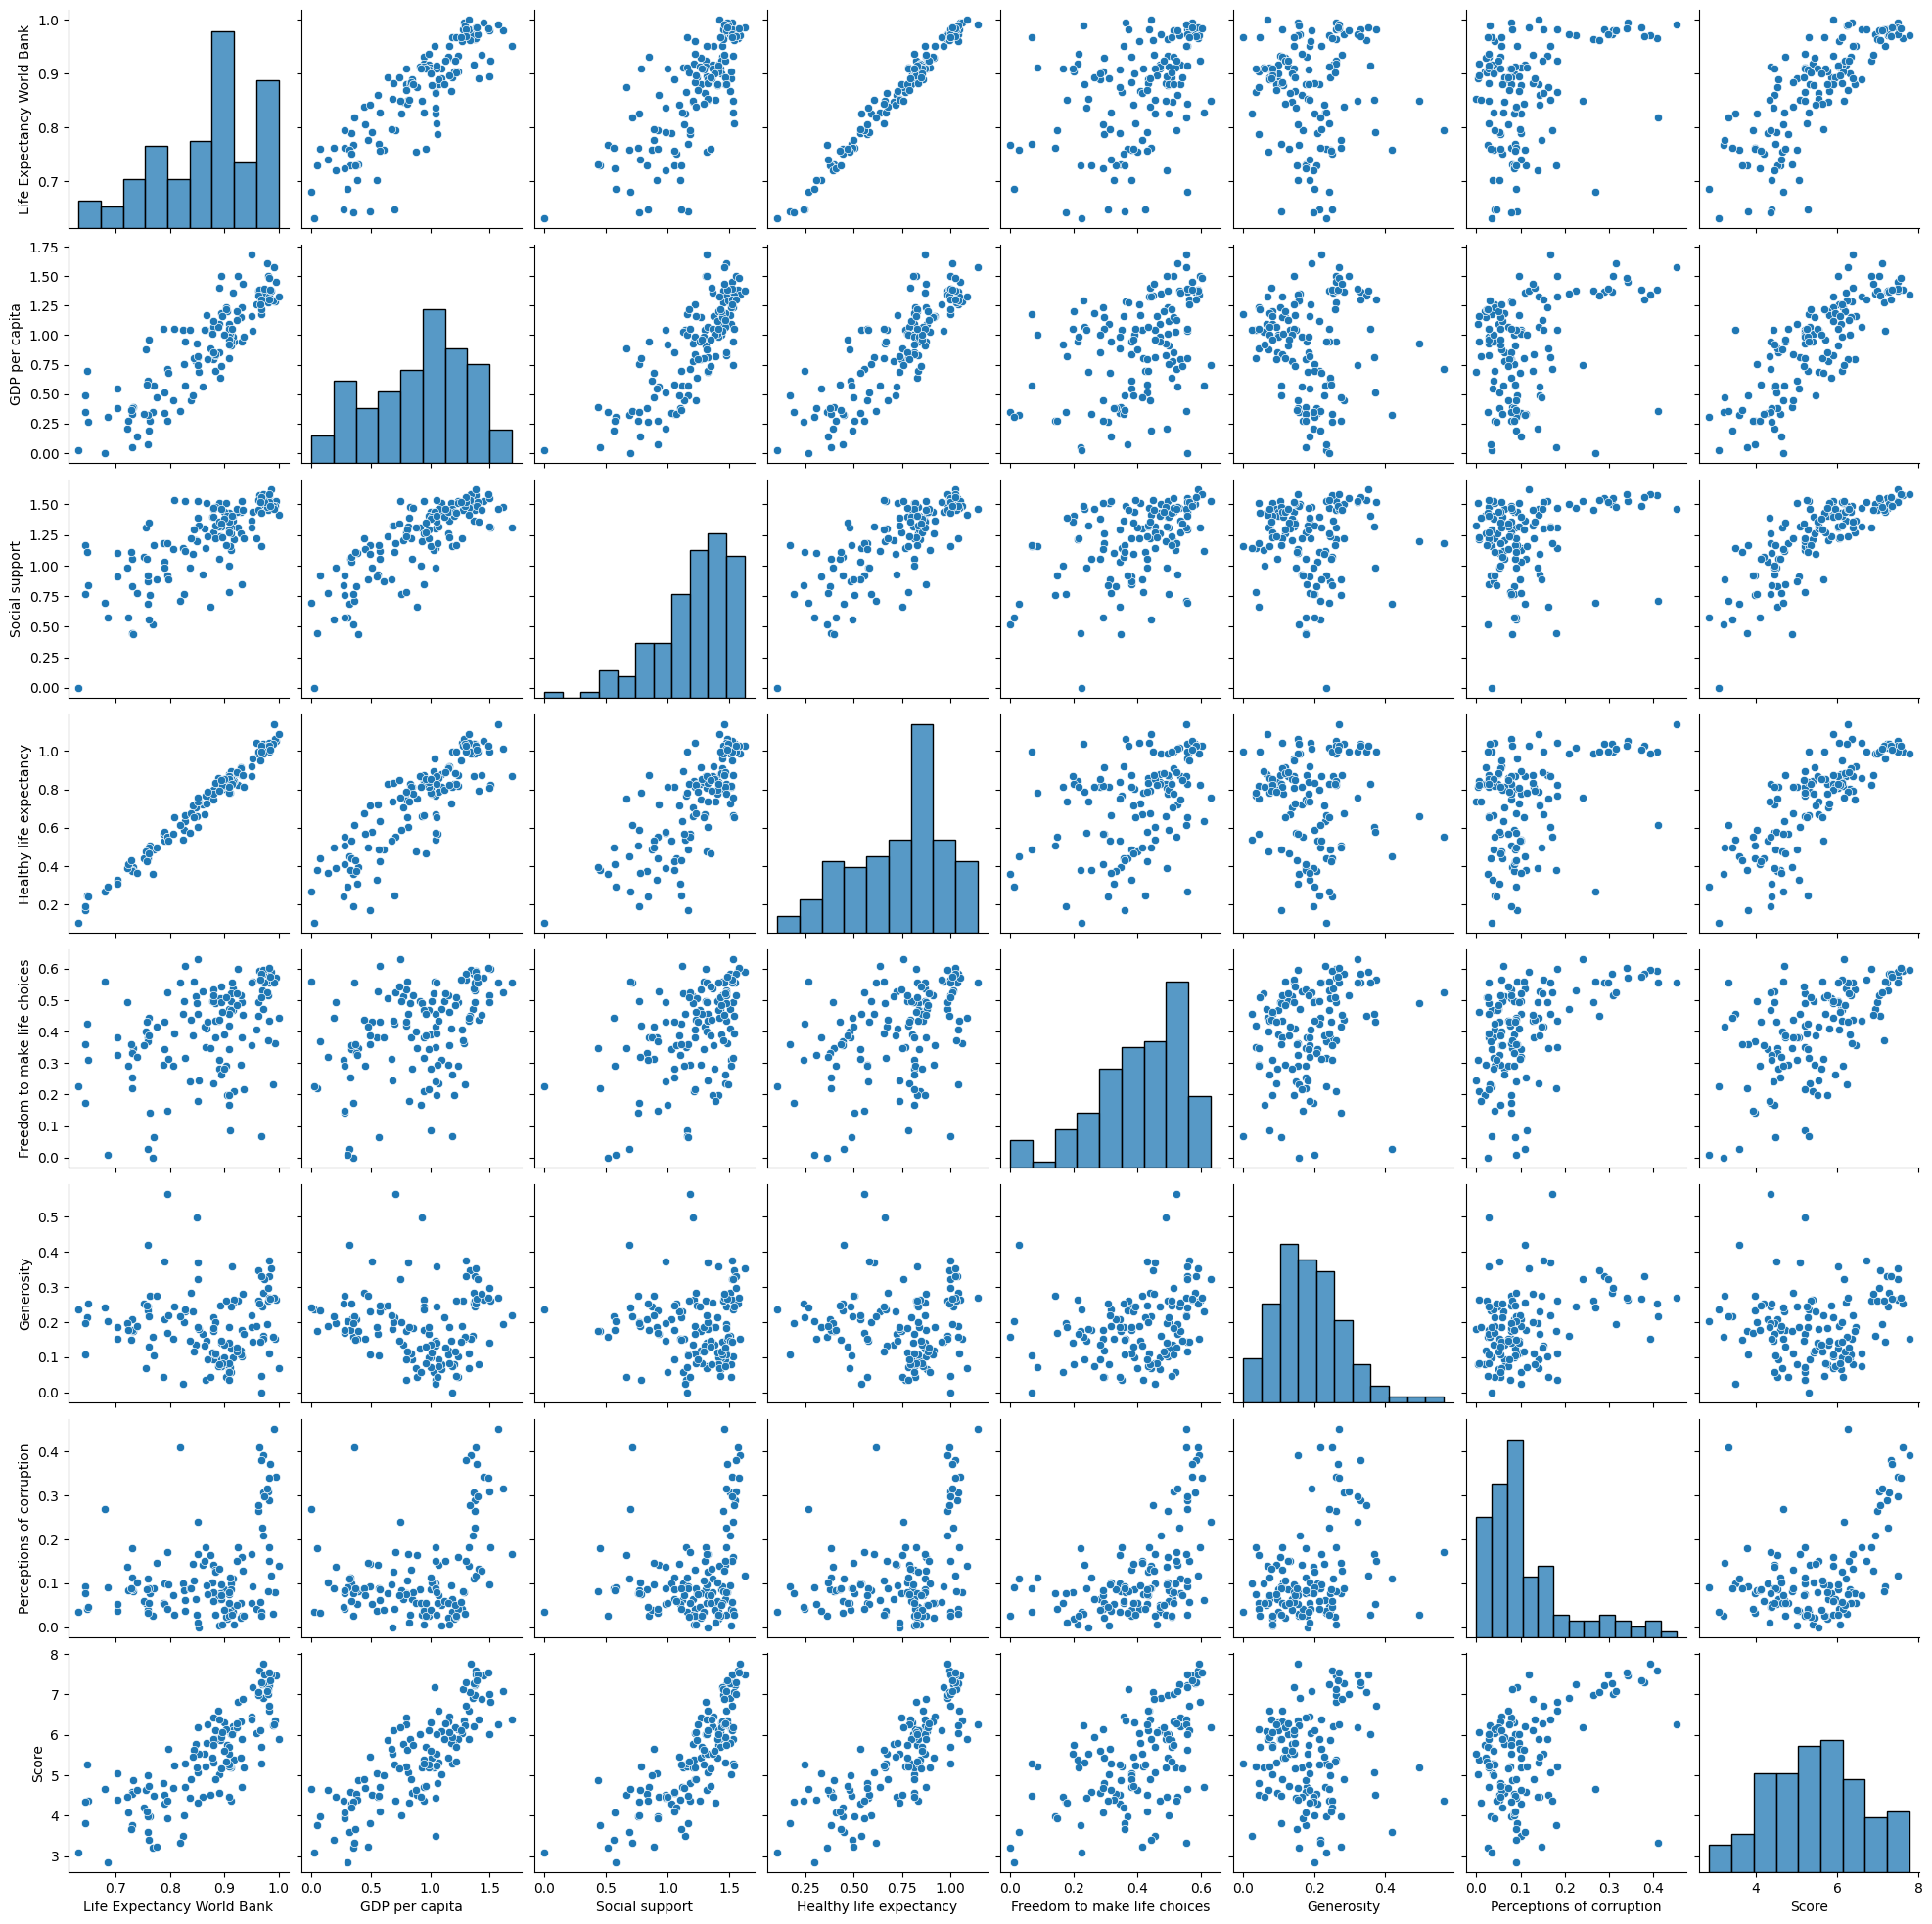

In [ ]:
# Pairplot for selected variables
selected_vars = ['Life Expectancy World Bank', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']
sns.pairplot(merged_df[selected_vars])
plt.show()

The motivation behind this code is to gain insights into the pairwise relationships among key variables in our dataset. The selected variables include life expectancy, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption, and happiness score. The pairplot visually represents scatter plots for each pair of variables, histograms along the diagonal, and correlation coefficients. This aids in identifying potential patterns, trends, or correlations, providing a preliminary exploration of the dataset's structure.

### GDP per capita vs. Life Expectancy

We want to explore the relationship between GDP per capita and life expectancy. A scatter plot can help visualize whether there is any correlation between these two variables.

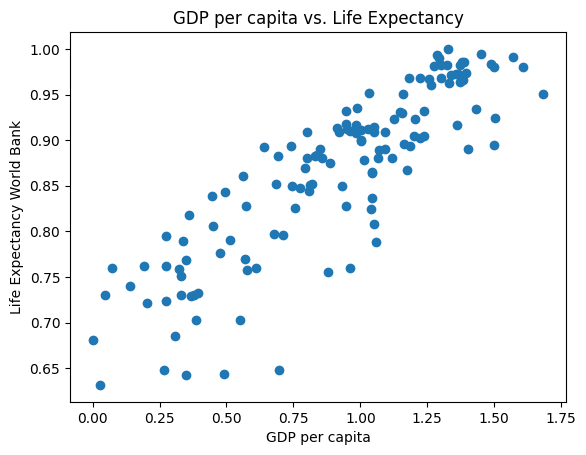

In [ ]:
plt.scatter(merged_df['GDP per capita'], merged_df['Life Expectancy World Bank'])
plt.title('GDP per capita vs. Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy World Bank')
plt.show()

The scatter plot displays points representing each country in the dataset. The x-axis represents GDP per capita, the y-axis represents life expectancy. By visualizing the points, we can assess if there's a trend or correlation between GDP per capita and life expectancy. This plot helps in understanding the distribution of countries based on these two variables.

### Score vs. Life Expectancy

We want to explore the relationship between the happiness score and life expectancy.

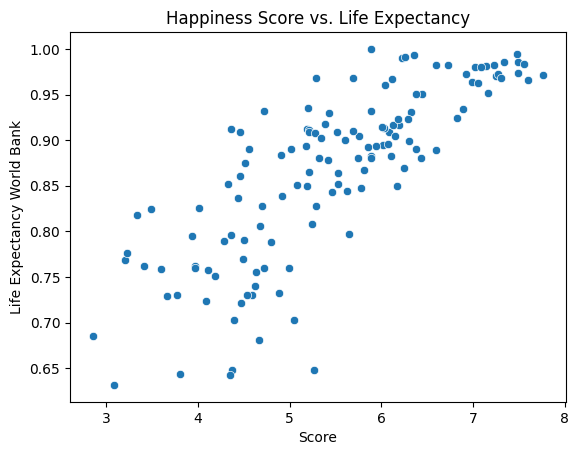

In [ ]:
sns.scatterplot(x='Score', y='Life Expectancy World Bank', data=merged_df)
plt.title('Happiness Score vs. Life Expectancy')
plt.xlabel('Score')
plt.ylabel('Life Expectancy World Bank')
plt.show()

The scatter plot visually represents the relationship between the happiness score ('Score') and life expectancy ('Life Expectancy World Bank') for each country in the merged dataset. Each point on the plot corresponds to a country, where the x-axis represents the happiness score, and the y-axis represents life expectancy. This visualization helps us understand if there is any discernible pattern or correlation between a country's happiness score and its life expectancy.

### Boxplot of Score by Income Group

We want to visually explore the distribution of happiness scores across different income groups. The happiness scores based on the income group, providing insights into potential socio-economic factors influencing well-being.

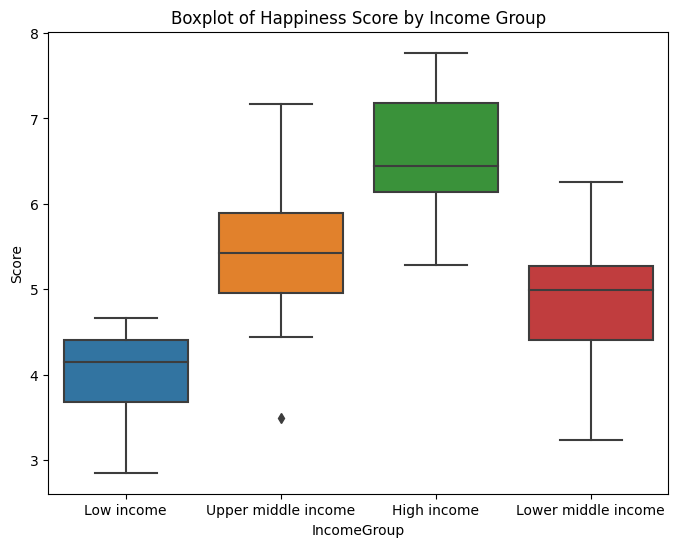

In [ ]:
# Boxplot for categorical variables
plt.figure(figsize=(8, 6))
sns.boxplot(x='IncomeGroup', y='Score', data=merged_df)
plt.title(f'Boxplot of Happiness Score by Income Group')
plt.show()

The boxplot visually represents the distribution of happiness scores (Score) within each income group. It allows us to observe the central tendency, spread, and potential outliers in the happiness scores for different income groups. Each box represents the interquartile range (IQR) with the median indicated by the line inside the box.  Outliers beyond the whiskers are shown as individual points as seen for the upper-middle-income group. This visualization aids in understanding whether there are variations in happiness scores among different income groups. 

## Analysis

###  Independent t-test on Income Group and Life Expectancy 

In [ ]:
# Motivation: Explore the distribution of life expectancy in different income groups.

# Select relevant columns
income_life_expectancy = merged_df[['IncomeGroup', 'Life Expectancy World Bank']]

# Group by income group and calculate summary statistics
income_stats = income_life_expectancy.groupby('IncomeGroup')['Life Expectancy World Bank'].describe()

# Explanation: The summary statistics provide an overview of the distribution of life expectancy in different income groups.

# Motivation: Conduct a t-test to determine if there is a significant difference in life expectancy between low and high-income groups.

# Separate data into low and high-income groups
low_income = merged_df[merged_df['IncomeGroup'] == 'Low income']['Life Expectancy World Bank']
high_income = merged_df[merged_df['IncomeGroup'] == 'High income']['Life Expectancy World Bank']

# Perform t-test
t_statistic, p_value = ttest_ind(low_income, high_income, equal_var=False)
t_statistic,p_value
# Explanation: The t-test results show a significant difference in life expectancy between low and high-income groups. The p-value is below the significance level, rejecting the null hypothesis.

# Additional Interpretation: 
# H0: There is no significant difference in life expectancy between different income groups.
# Ha: There is a significant difference in life expectancy between different income groups.

# Statistical evidence supports the claim that there is a significant difference in life expectancy between the income groups.


(-18.32102169809818, 1.6857114352106575e-16)

### ANOVA for 'Score' across different 'IncomeGroup' categories

We are conducting an analysis to examine the impact of income group on the happiness scores in the merged dataset. The F-statistic and p-value obtained from the one-way ANOVA test will help us determine whether there are statistically significant differences in happiness scores among different income groups.

In [ ]:
f_stat_income, p_value_income = f_oneway(
    merged_df['Score'][merged_df['IncomeGroup'] == 'Low income'],
    merged_df['Score'][merged_df['IncomeGroup'] == 'Lower middle income'],
    merged_df['Score'][merged_df['IncomeGroup'] == 'Upper middle income'],
    merged_df['Score'][merged_df['IncomeGroup'] == 'High income'],
)
f_stat_income,p_value_income

(78.74348806986805, 5.180787448790301e-29)

The F-statistic is a measure of the ratio of variances between groups and within groups. A higher F-statistic suggests that the means of at least two groups are significantly different. The p-value is used to determine the statistical significance of the F-statistic. In this case, the F-statistic value of 78.74 and the extremely low p-value of 5.18e-29 provide strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there are significant differences in happiness scores among the income groups. This suggests that income group has a statistically significant impact on happiness scores, and further post-hoc tests or analyses may be warranted to explore specific group differences.

### ANOVA for 'Healthy life expectancy' across different 'IncomeGroup' categories

The following code performs a one-way ANOVA (Analysis of Variance) test to examine whether there are statistically significant differences in the 'Healthy life expectancy' among countries grouped by their income levels. The income groups include 'Low income,' 'Lower middle income,' 'Upper middle income,' and 'High income.'

In [ ]:
f_stat_health_income, p_value_health_income = f_oneway(
    merged_df['Healthy life expectancy'][merged_df['IncomeGroup'] == 'Low income'],
    merged_df['Healthy life expectancy'][merged_df['IncomeGroup'] == 'Lower middle income'],
    merged_df['Healthy life expectancy'][merged_df['IncomeGroup'] == 'Upper middle income'],
    merged_df['Healthy life expectancy'][merged_df['IncomeGroup'] == 'High income'],
)
f_stat_health_income, p_value_health_income

(105.00717197112093, 1.8282840486424895e-34)

The one-way ANOVA test results in an F-statistic of approximately 105.01 and an extremely small p-value (1.83e-34). This low p-value suggests that there are significant differences in the mean 'Healthy life expectancy' across different income groups. Therefore, we can reject the null hypothesis that the means are equal. The F-statistic provides an overall measure of these differences. This information is crucial for understanding how 'Healthy life expectancy' varies across income groups, contributing to a comprehensive analysis of the dataset's socio-economic indicators.

## Regression Models and Model Fitting

### Regression on Life Expectancy+Score

The motivation for this code block is to perform a simple linear regression analysis. The dependent variable is 'Life Expectancy World Bank,' and the independent variable is 'Score' from the World Happiness Report. Our goal is to understand the relationship between the happiness score and life expectancy.

In [ ]:
X_regression = merged_df[['Score']]
y_regression = merged_df['Life Expectancy World Bank']

X_regression = sm.add_constant(X_regression)

# Fit linear regression model
model_regression = sm.OLS(y_regression, X_regression).fit()

model_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Life Expectancy World Bank   R-squared:                       0.626
Model:                                    OLS   Adj. R-squared:                  0.623
Method:                         Least Squares   F-statistic:                     219.3
Date:                        Wed, 20 Dec 2023   Prob (F-statistic):           9.16e-30
Time:                                18:10:33   Log-Likelihood:                 193.02
No. Observations:                         133   AIC:                            -382.0
Df Residuals:                             131   BIC:                            -376.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5126      0.024     21.062      0.000       0.464       0.561
Score          0.0647      0.004     14.809      0.000       0.056       0.073
==============================================================================
Omnibus:                       10.444   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.621
Skew:                          -0.537   Prob(JB):                      0.00300
Kurtosis:                       3.971   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression analysis was conducted to explore the relationship between the happiness score ('Score') and life expectancy ('Life Expectancy World Bank'). The regression model yielded a statistically significant result (F-statistic: 219.3, p-value: 9.16e-30), indicating that the model is a good fit for the data. The R-squared value of 0.626 suggests that approximately 62.6% of the variability in life expectancy can be explained by the happiness score. The coefficients for the intercept (0.5126) and 'Score' (0.0647) reveal the estimated impact of a one-unit change in the happiness score on life expectancy. The 95% confidence intervals, diagnostic statistics, and other metrics provide additional insights into the model's reliability. Overall, this analysis suggests a significant and positive association between happiness and life expectancy.

### Regression with Interaction

The motivation for creating interaction terms in regression analysis is to capture potential synergies or dependencies between predictor variables that may have a combined effect on the target variable. In this specific example, we are considering a linear regression model to understand the relationship between various features related to happiness and socio-economic indicators and the life expectancy of individuals.

In [ ]:
X_interaction = merged_df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y_interaction = merged_df['Life Expectancy World Bank']

X_interaction = sm.add_constant(X_interaction)

# Create interaction terms
X_interaction['GDP_Support_Interaction'] = X_interaction['GDP per capita'] * X_interaction['Social support']
X_interaction['GDP_Health_Interaction'] = X_interaction['GDP per capita'] * X_interaction['Healthy life expectancy']

# Fit linear regression model with interactions
model_interaction = sm.OLS(y_interaction, X_interaction).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Life Expectancy World Bank   R-squared:                       0.981
Model:                                    OLS   Adj. R-squared:                  0.979
Method:                         Least Squares   F-statistic:                     698.2
Date:                        Wed, 20 Dec 2023   Prob (F-statistic):          4.40e-101
Time:                                18:10:33   Log-Likelihood:                 390.47
No. Observations:                         133   AIC:                            -760.9
Df Residuals:                             123   BIC:                            -732.0
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5918      0.012     49.187      0.000       0.568       0.616
Score                           -0.0009      0.002     -0.367      0.714      -0.006       0.004
GDP per capita                   0.0317      0.016      1.987      0.049       0.000       0.063
Social support                  -0.0324      0.014     -2.392      0.018      -0.059      -0.006
Healthy life expectancy          0.4010      0.021     19.257      0.000       0.360       0.442
Freedom to make life choices    -0.0074      0.011     -0.678      0.499      -0.029       0.014
Generosity                       0.0168      0.014      1.247      0.215      -0.010       0.044
Perceptions of corruption        0.0016      0.016      0.101      0.920      -0.030       0.034
GDP_Support_Interaction          0.0155      0.017      0.922      0.358      -0.018       0.049
GDP_Health_Interaction          -0.0325      0.024     -1.379      0.170      -0.079       0.014
==============================================================================
Omnibus:                        3.395   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.031
Skew:                           0.234   Prob(JB):                        0.220
Kurtosis:                       3.573   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output from the extended linear regression model provides valuable insights into the relationships between predictor variables and the life expectancy of the observed entities. The R-squared value of 0.981 indicates a substantial proportion of the variability in life expectancy is explained by the model, suggesting a robust fit. P-values are crucial in determining the statistical significance of each variable. 'Social support' stands out as statistically significant (p-value = 0.018), suggesting that it plays a meaningful role in influencing life expectancy. The overall high R-squared indicates the model's effectiveness.

### Final Regression Model

The regression model is constructed to understand the relationship between life expectancy (Life Expectancy World Bank) and various factors such as happiness score (Score), GDP per capita (GDP per capita), social support (Social support), healthy life expectancy (Healthy life expectancy), freedom to make life choices (Freedom to make life choices), generosity (Generosity), and perceptions of corruption (Perceptions of corruption). The goal is to assess how well these factors collectively explain the variation in life expectancy.

In [ ]:
X_regression = merged_df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y_regression = merged_df['Life Expectancy World Bank']

# Add a constant term to the independent variables
X_regression = sm.add_constant(X_regression)

# Fit linear regression model
model_regression = sm.OLS(y_regression, X_regression).fit()

model_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Life Expectancy World Bank   R-squared:                       0.981
Model:                                    OLS   Adj. R-squared:                  0.979
Method:                         Least Squares   F-statistic:                     898.0
Date:                        Wed, 20 Dec 2023   Prob (F-statistic):          1.26e-103
Time:                                18:10:33   Log-Likelihood:                 389.45
No. Observations:                         133   AIC:                            -762.9
Df Residuals:                             125   BIC:                            -739.8
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5958      0.007     83.959      0.000       0.582       0.610
Score                           -0.0014      0.002     -0.647      0.519      -0.006       0.003
GDP per capita                   0.0271      0.006      4.181      0.000       0.014       0.040
Social support                  -0.0194      0.007     -2.699      0.008      -0.034      -0.005
Healthy life expectancy          0.3762      0.010     36.472      0.000       0.356       0.397
Freedom to make life choices    -0.0053      0.011     -0.499      0.618      -0.027       0.016
Generosity                       0.0159      0.013      1.189      0.237      -0.011       0.042
Perceptions of corruption       -0.0040      0.015     -0.273      0.785      -0.033       0.025
==============================================================================
Omnibus:                        4.761   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                5.537
Skew:                           0.194   Prob(JB):                       0.0628
Kurtosis:                       3.921   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model results indicate a high level of explanatory power (R-squared: 0.981), suggesting that the chosen independent variables collectively explain 98.1% of the variance in life expectancy. The F-statistic tests the overall significance of the model, and in this case, the low p-value (1.26e-103) suggests that the model is statistically significant. Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable. The p-values associated with each coefficient indicate their significance. For instance, a low p-value (typically < 0.05) suggests that the variable is statistically significant. The summary table provides additional statistical information such as standard errors, t-values, and confidence intervals for each coefficient. Checking for multicollinearity and interpreting coefficient significance helps in understanding the impact of each variable on life expectancy. The notes section highlights assumptions and details about the regression model.

## Assumptions

### Linearity: Residuals vs Predicted Values

The linearity assumption in regression analysis implies that there should be a linear relationship between the independent variables and the dependent variable. We intend to assess this assumption by examining the relationship between the fitted values and the residuals. A scatter plot of residuals against predicted values can reveal patterns that violate linearity.

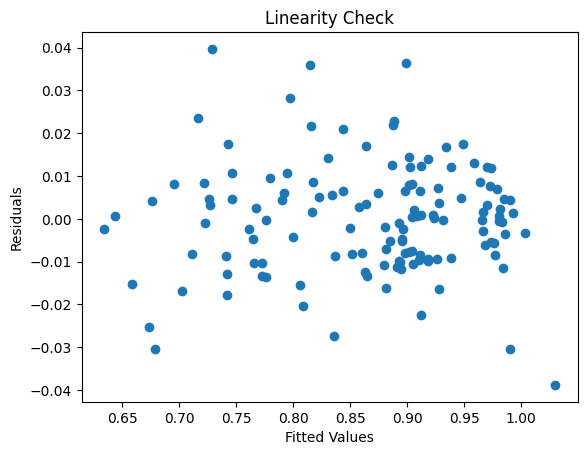

In [ ]:
# Add a constant term to the independent variables
X_regression = sm.add_constant(X_regression)

# Fit linear regression model
model_regression = sm.OLS(y_regression, X_regression).fit()

# Residuals
residuals = model_regression.resid

# Linearity: Residuals vs Predicted Values
plt.scatter(model_regression.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

The scatter plot displays the residuals (vertical axis) against the predicted values (horizontal axis). Ideally, we expect to see a random distribution of points with no discernible pattern. Due to the lack of a clear pattern from the graph above, the relationship between the independent variables and the dependent variable is linear. The assumption of constant variance, also known as homoscedasticity, outlines that the spread of residuals should be the same at each level of the predicted response to discourage unbiased estimators of parameters. 

### Independence of Residuals

We are checking the Durbin-Watson statistic to assess the independence of residuals in a linear regression model. The Durbin-Watson statistic ranges between 0 and 4, with values close to 2 indicating no serial correlation (independence of residuals). A value significantly different from 2 may suggest the presence of autocorrelation in the residuals. This information is crucial for assessing the validity of the linear regression assumptions, specifically the independence of residuals.

In [ ]:
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
dw_statistic

1.7322648052646525

The Durbin-Watson statistic is calculated to be 1.7322648052646525. The statistic being close to 2 suggests that there is a mild positive autocorrelation in the residuals. If the value were exactly 2, it would indicate no autocorrelation. 

### Homoscedasticity: Residuals vs Fitted Values

Homoscedasticity is an assumption of linear regression that states the variance of the residuals should be constant across all levels of the independent variable(s). Violation of homoscedasticity can lead to inefficient estimates and biased standard errors. Therefore, it's crucial to visually inspect the residuals against the fitted values to assess homoscedasticity.

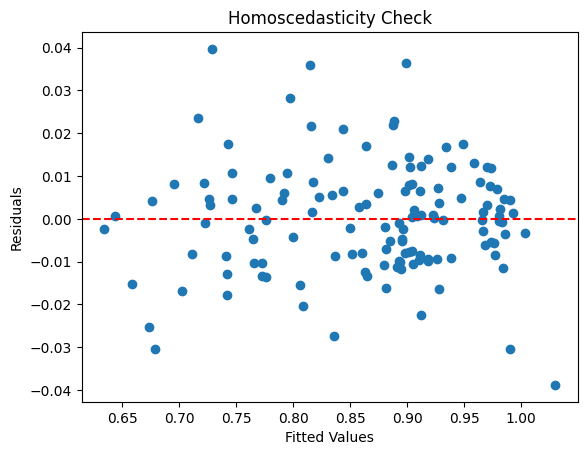

In [ ]:
plt.scatter(model_regression.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

The scatter plot above displays the residuals against the fitted values. The red dashed line represents the ideal scenario where residuals have a constant variance (homoscedasticity) across all levels of the fitted values. The points are randomly scattered around the horizontal axis and do not follow any discernible pattern, hence homoscedasticity is present.

### Normality of Residuals: Q-Q Plot

We want to check the normality of residuals is important to assess whether the residuals from the regression model follow a normal distribution. This is a crucial assumption for linear regression models.

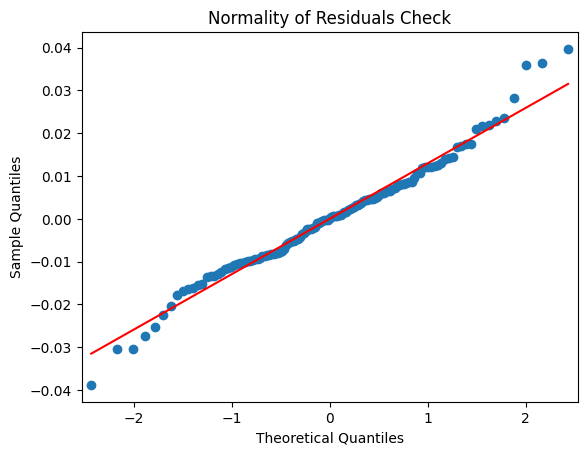

In [ ]:
sm.qqplot(residuals, line='s')
plt.title('Normality of Residuals Check')
plt.show()

The Q-Q plot is a graphical tool used to assess whether a set of data follows a specific theoretical distribution. In this case, the Q-Q plot compares the distribution of the residuals to the expected distribution of a normal (Gaussian) distribution. The points on the plot closely follow the reference line ('s' line), which suggests that the residuals are approximately normally distributed. This assumption is met as the population within the dataset appears relatively normal with few skewed data points. The linearity clause requires the independent and dependent variables to have a linear relationship, meaning that a change in one variable will lead to a proportional change in the other. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53a1633d-efde-4cbe-8122-a9f48bbc3e84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>